In [1]:
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from joblib import load,dump
import scipy.linalg as la
from scipy.optimize import nnls

import sys
sys.path.insert(0,'../scripts/')
from processDynamic import ProcessDynamic

In [2]:
# # I saved my own model data as pickle files, but may not need
# model_output = load('../data/p14model-ocv.pkl')
#model_data = load('../data/p14model-data.pkl')

In [3]:
# Note, had to resave this data in Octave like so: save -mat7-binary 'file.mat' model
#data = scipy.io.loadmat('../data/P14model-ocv-mat7.mat', simplify_cells=True)

In [4]:
test = ProcessDynamic(model_dir='../data/',do_hyst=1)

In [5]:
test.load_data()

In [6]:
test.process_DYN_step1()

25 14.531852290290429 0.9910212941308391
5 14.482598404517704 0.9874053548391215
45 14.414656461803379 0.9902808733940264


In [7]:
test.process_DYN_step2()

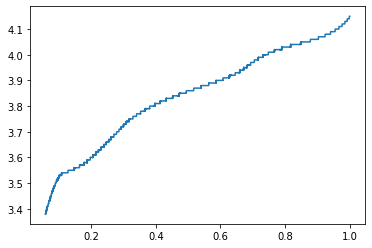

In [8]:
plt.plot(test.model[5]['Z'],test.model[5]['OCV'][0])

In [9]:
#test.minfn(5,1)

In [10]:
#test.minfn(25,0)

In [11]:
#test.minfn(45,0)

### Definitely something wrong with optfn/minfn because no responding correctly to changes in G
- Next steps: Compare Optfn between python and matlab directly 

In [12]:
# Processing temperature 5
# G = 96.110
# look here
# M = 0.037733
# M0 = 2.4422e-03
# R0 = 4.6328e-03
# Rfact = 7.6053e-04

print('look here',M,M0,R0,Rfact)

In [13]:
test.optfn(96.110,5,1)

../scripts/processDynamic.py:259: ComplexWarning: Casting complex values to real discards the imaginary part
  vrcRaw[:,i] = np.diag(RCfact)*vrcRaw[:,i-1] + (1-RCfact)*current[i-1]


RMS error for present value of gamma = 9.630000 (mV)
The model created for this value of gamma is the best ESC model yet! GParam =  96.11


0.00962863741218036

In [14]:
test.optfn(92,25,1)

RMS error for present value of gamma = 5.550000 (mV)
The model created for this value of gamma is the best ESC model yet! GParam =  92


0.005553589974017236

In [15]:
test.optfn(67,25,1)

RMS error for present value of gamma = 5.570000 (mV)


0.00556646562208994

In [16]:
test.process_DYN_step3(1)

Processing temperature:  25
RMS error for present value of gamma = 5.470000 (mV)
The model created for this value of gamma is the best ESC model yet! GParam =  96.10953680127616
RMS error for present value of gamma = 5.560000 (mV)
RMS error for present value of gamma = 5.550000 (mV)
RMS error for present value of gamma = 5.390000 (mV)
The model created for this value of gamma is the best ESC model yet! GParam =  105.49422471880064
RMS error for present value of gamma = 5.380000 (mV)
The model created for this value of gamma is the best ESC model yet! GParam =  124.36190890173584
RMS error for present value of gamma = 5.350000 (mV)
The model created for this value of gamma is the best ESC model yet! GParam =  115.43182897292773
RMS error for present value of gamma = 5.340000 (mV)
The model created for this value of gamma is the best ESC model yet! GParam =  115.38090424672396
RMS error for present value of gamma = 5.330000 (mV)
The model created for this value of gamma is the best ESC m

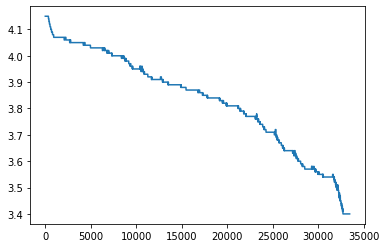

In [17]:
plt.plot(test.model[25]['vest1'])

In [18]:
test.model[45]

{'GParam': 0,
 'RCParam': [0],
 'Q': 14.414656461803379,
 'eta': 0.9902808733940264,
 'Z': array([1.        , 1.        , 1.        , ..., 0.06662466, 0.06662466,
        0.06662466]),
 'OCV': (array([4.15, 4.15, 4.15, ..., 3.4 , 3.4 , 3.4 ]),
  array([2.80628877, 2.89831821, 2.97972307, 3.04331735, 3.09711404,
         3.14442792, 3.18665405, 3.22432156, 3.2582482 , 3.28927056,
         3.31750076, 3.34384071, 3.36802976, 3.39058162, 3.41143512,
         3.43120472, 3.44950145, 3.46676953, 3.48295679, 3.4980954 ,
         3.51228346, 3.52476894, 3.53393379, 3.53937038, 3.54246229,
         3.54482229, 3.54730538, 3.54951028, 3.5519706 , 3.55427249,
         3.5567669 , 3.55939734, 3.56214186, 3.56500547, 3.56824693,
         3.57161342, 3.57524792, 3.57920596, 3.58362929, 3.58846357,
         3.59363484, 3.59899042, 3.60495937, 3.61089248, 3.61714509,
         3.62331193, 3.62944327, 3.63571963, 3.64191939, 3.64872303,
         3.65558537, 3.66255619, 3.66889864, 3.67481831, 3.6807842

In [19]:
# options=optimset('TolX',1e-8,'TolFun',1e-8,'MaxFunEval',100000, ...
# 'MaxIter',1e6,'Jacobian','Off'); % for later optimization
# options=optimset('TolX',0.1,'TolFun',1e-2,'MaxFunEval',40, ...
# 'MaxIter',20,'Jacobian','Off'); % for later optimization

In [20]:
def optfn(x):
    return 150

In [21]:
function = lambda x: optfn(x)

In [22]:
#scipy.optimize.brentq(function,-1,1,xtol=0.0000001)

In [23]:
scipy.optimize.fmin(function,[1,250])

Optimization terminated successfully.
         Current function value: 150.000000
         Iterations: 18
         Function evaluations: 71


array([  1., 250.])

In [24]:
from oct2py import octave

In [25]:
scipy.optimize.fminbound(function,1,250)

249.99998793209343

In [26]:
#octave.fminbnd('@(x) optfn(x)',1,250)